# MNIST training with Tensorflow

[Source code](https://medium.com/@dhokashutosh245/training-a-tensorflow-ml-model-on-mnist-a-step-by-step-guide-372376ce26fc)

## Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## MNIST Loading

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalisation

## Sample checking

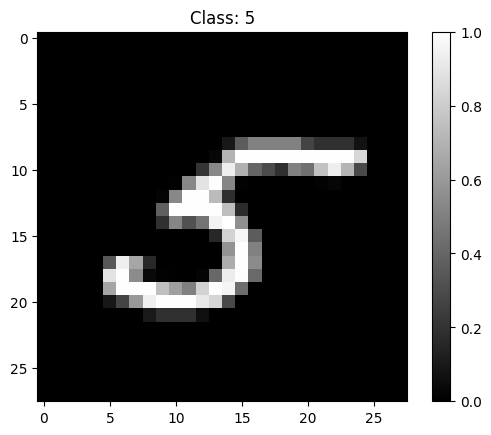

In [3]:
# random sample selection
index = np.random.randint(0, x_train.shape[0])
random_image = x_train[index]
random_label = y_train[index]

# sample display
plt.imshow(random_image, cmap='gray')
plt.title(f'Class: {random_label}')
plt.colorbar()
plt.grid(False)
plt.show()

## Model definition

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense (64, activation="relu"),
    tf.keras.layers.Dense (32, activation="relu"),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [5]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [6]:
model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=["accuracy"],
    )

## Model training

In [7]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 408us/step - loss: 0.2973 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 1s 418us/step - loss: 0.1357 - accuracy: 0.9592
Epoch 3/5
1875/1875 [==============================] - 1s 405us/step - loss: 0.1017 - accuracy: 0.9695
Epoch 4/5
1875/1875 [==============================] - 1s 400us/step - loss: 0.0805 - accuracy: 0.9756
Epoch 5/5
1875/1875 [==============================] - 1s 404us/step - loss: 0.0668 - accuracy: 0.9798


## Model validation

In [8]:
res = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0793 - accuracy: 0.9752 - 124ms/epoch - 395us/step
